## 1. Aufgabenblatt - Graphbibliothek

In [1]:
from src.Graph import Graph
from src.printGraph import draw_graph
from src.CustomExceptions import *
import src.shortestPaths as sp

In [2]:
import test_.HelperClass as Hc
from test_.Performancetest import GraphPerformanceTester

In [3]:
import networkx as nx

import random
import time
import timeit
from tqdm import tqdm
import matplotlib.pyplot as plt

Graph den wir nutzen werden:

<img src="test_/Graph_for_testing.jpg" width=400>

Knotenmenge: {'-1', '12', '5', '15', '9', '6', '8', '11', '10', '13', '0', '3', '1', '2', '7', '4'}

the Graph contains the following Nodes: -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15

The Graph contains the following edges (Metis Format):
-1: 0
0: -1
1: 2
2: 1, 3
3: 2, 4, 5
4: 3, 5
5: 3, 4
6: 7, 8
7: 6
8: 6
9
10: 11, 13
11: 10, 12
12: 11, 13
13: 10, 12
15


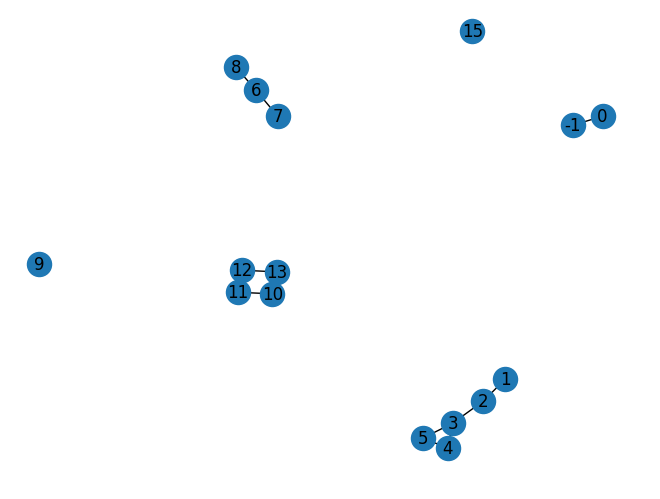

In [4]:
# Erstellung eines Graphens
G, _, _ = Hc.create_graph()

# Zugriff auf die Knotenmenge
nodes = G.get_nodes()
print(f"Knotenmenge: {nodes}\n")

# and pretty printing
G.print_nodes()
print("")

# print edges
G.print_edges()

# draw the Graph using networkx
draw_graph(G, True)

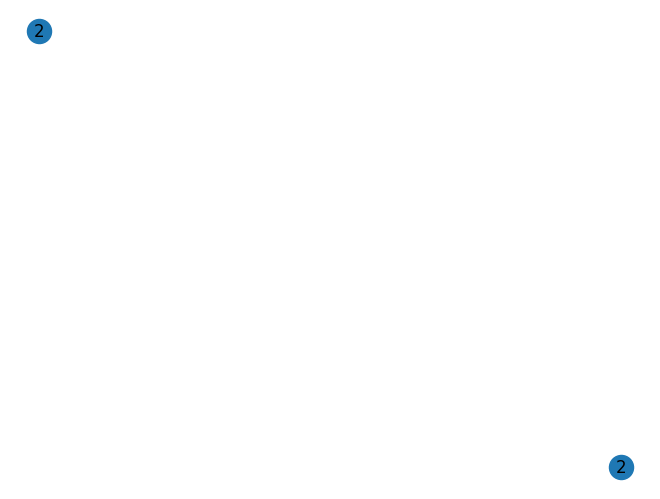

In [5]:
newG = nx.Graph()

newG.add_node(2)
newG.add_node("2")

nx.draw(newG, with_labels=True)
plt.show()

In [6]:
# von jedem Knoten kann auf seine Nachbarn zugegriffen werden
n1 = G.get_neighbors(1)
print(f"Neighbors of Node '1': {n1}")
n2 = G.get_neighbors("2")
print(f"Neighbors of Node '2': {n2}")
n3 = G.get_neighbors("5")
print(f"Neighbors of Node '5': {n3}")

# wenn der Knoten nicht existiert, dann wird eine Exception geworfen
try:
    G.get_neighbors("42")
except NodeDoesNotExistException:
    print("Node does not exist!")

Neighbors of Node '1': {'2'}
Neighbors of Node '2': {'3', '1'}
Neighbors of Node '5': {'3', '4'}
Node does not exist!


In [7]:
# teste für jeden Knoten ob sie benachbart sind
print(G.test_neighbors("1", "2"))
print(G.test_neighbors("3", "5"))
print(G.test_neighbors("4", "1"))

# Die Relation ist natürlich symmetrisch
print(G.test_neighbors("1", "4"))

# wenn der Knoten nicht existiert wird ebenfalls eine Exception geworfen
try:
    G.test_neighbors("5", "42")
except NodeDoesNotExistException:
    print("Node does not exist!")

True
True
False
False
Node does not exist!


In [8]:
# Methode die den Knotengrad für eine Methode zurückgibt
print(G.get_node_degree("4"))
print(G.get_node_degree("1"))
print(G.get_node_degree("0"))

2
1
1


In [9]:
# Knoten und Kanten können gelöscht werden
# hat der Knoten Kanten, so werden diese automatisch entfernt
G.add_node("42")
G.print_nodes()
G.remove_node("42")
G.print_nodes()
print("")

# Kanten können ebenfalls gelöscht werden
G.add_edge("9", "8")
G.print_edges()
print("")
G.remove_edge("8", "9")
G.print_edges()

the Graph contains the following Nodes: -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 42
the Graph contains the following Nodes: -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15

The Graph contains the following edges (Metis Format):
-1: 0
0: -1
1: 2
2: 1, 3
3: 2, 4, 5
4: 3, 5
5: 3, 4
6: 7, 8
7: 6
8: 9, 6
9: 8
10: 11, 13
11: 10, 12
12: 11, 13
13: 10, 12
15

The Graph contains the following edges (Metis Format):
-1: 0
0: -1
1: 2
2: 1, 3
3: 2, 4, 5
4: 3, 5
5: 3, 4
6: 7, 8
7: 6
8: 6
9
10: 11, 13
11: 10, 12
12: 11, 13
13: 10, 12
15


-1 0
1 2
2 3
3 4
3 5
4 5
6 7
6 8
10 11
10 13
11 12
12 13


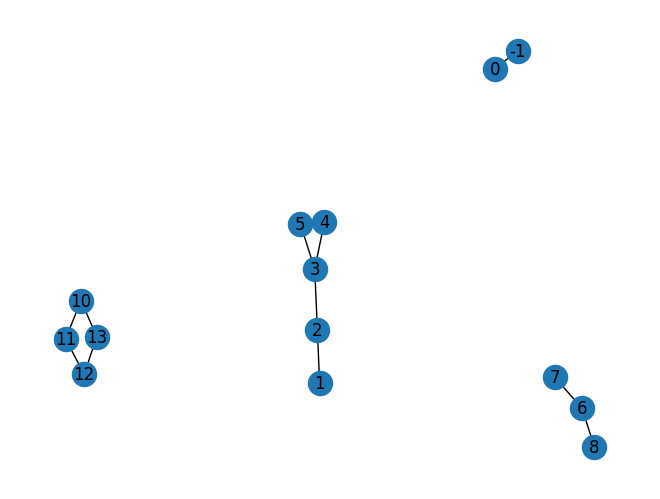

In [10]:
# Ein- und Ausgabe
# 1) Edge list Format
G.save_graph_as_edge_list("test")

with open("test.txt") as file:
    for line in file:
        print(line, end="")
        
newG = Graph("test.txt")
draw_graph(newG, label_on=True)

16 12
2
1
4
3 5
4 6 7
5 7
5 6
9 10
8
8

13 15
12 14
13 15
12 14


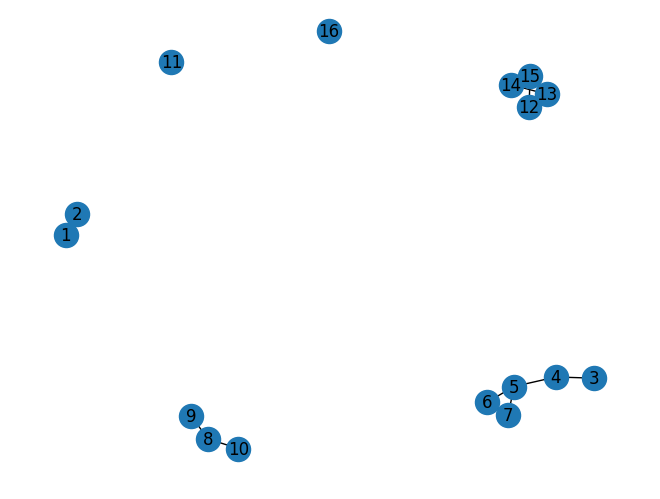

In [11]:
# 2) Metis Format
G.save_graph_metis("test")

with open("test.txt") as file:
    for line in file:
        print(line, end="")
        
newG = Graph("test.txt", Graph.READ_MOD_METIS)
draw_graph(newG, label_on=True)

In [12]:
# kürzeste Pfade
# 1) single-source-shortest-path
print(sp.single_source_shortest_path(G, "1"))

{'-1': inf, '0': inf, '1': 0, '2': 1, '3': 2, '4': 3, '5': 3, '6': inf, '7': inf, '8': inf, '9': inf, '10': inf, '11': inf, '12': inf, '13': inf, '15': inf}


In [13]:
# 2) all-pairs-shortest-path
d = sp._all_pairs_shortest_path_single(G)
for key in d:
    print(d[key])

{'-1': 0, '0': 1, '1': inf, '2': inf, '3': inf, '4': inf, '5': inf, '6': inf, '7': inf, '8': inf, '9': inf, '10': inf, '11': inf, '12': inf, '13': inf, '15': inf}
{'-1': 1, '0': 0, '1': inf, '2': inf, '3': inf, '4': inf, '5': inf, '6': inf, '7': inf, '8': inf, '9': inf, '10': inf, '11': inf, '12': inf, '13': inf, '15': inf}
{'-1': inf, '0': inf, '1': 0, '2': 1, '3': 2, '4': 3, '5': 3, '6': inf, '7': inf, '8': inf, '9': inf, '10': inf, '11': inf, '12': inf, '13': inf, '15': inf}
{'-1': inf, '0': inf, '1': 1, '2': 0, '3': 1, '4': 2, '5': 2, '6': inf, '7': inf, '8': inf, '9': inf, '10': inf, '11': inf, '12': inf, '13': inf, '15': inf}
{'-1': inf, '0': inf, '1': 2, '2': 1, '3': 0, '4': 1, '5': 1, '6': inf, '7': inf, '8': inf, '9': inf, '10': inf, '11': inf, '12': inf, '13': inf, '15': inf}
{'-1': inf, '0': inf, '1': 3, '2': 2, '3': 1, '4': 0, '5': 1, '6': inf, '7': inf, '8': inf, '9': inf, '10': inf, '11': inf, '12': inf, '13': inf, '15': inf}
{'-1': inf, '0': inf, '1': 3, '2': 2, '3': 1, 

In [14]:
# 3) shortest s-t path
print(sp.shortest_s_t_path(G, "1", "4"))
print(sp.shortest_s_t_path(G, "1", "10"))
print(sp.shortest_s_t_path(G, "4", "4"))

(['1', '2', '3', '4'], 3)
([], inf)
(['4'], 0)


In [15]:
# 4) Zusammenhangskomponenten
print(sp.connected_components(G))

[{'-1', '0'}, {'5', '3', '1', '2', '4'}, {'8', '7', '6'}, {'9'}, {'11', '10', '13', '12'}, {'15'}]


# Vergleich mit NetworkX
## Single Source Shortest Path
* implementiert durch Breitensuche

#### level-weise berechnen
* alle Nachbarn von s bilden ein Level, die Nachbarn der Nachbarn bilden das nächste etc.
* abgearbeitetes Level wird weggeschmissen
>* vermeiden der Stack.pop() operation
>* Distanz für gesamtes Level gleich, muss nur inkrementiert werden

#### Speichereffizienz: O(n)

generating graphs


100%|██████████| 1000/1000 [00:01<00:00, 807.57it/s]


running tests


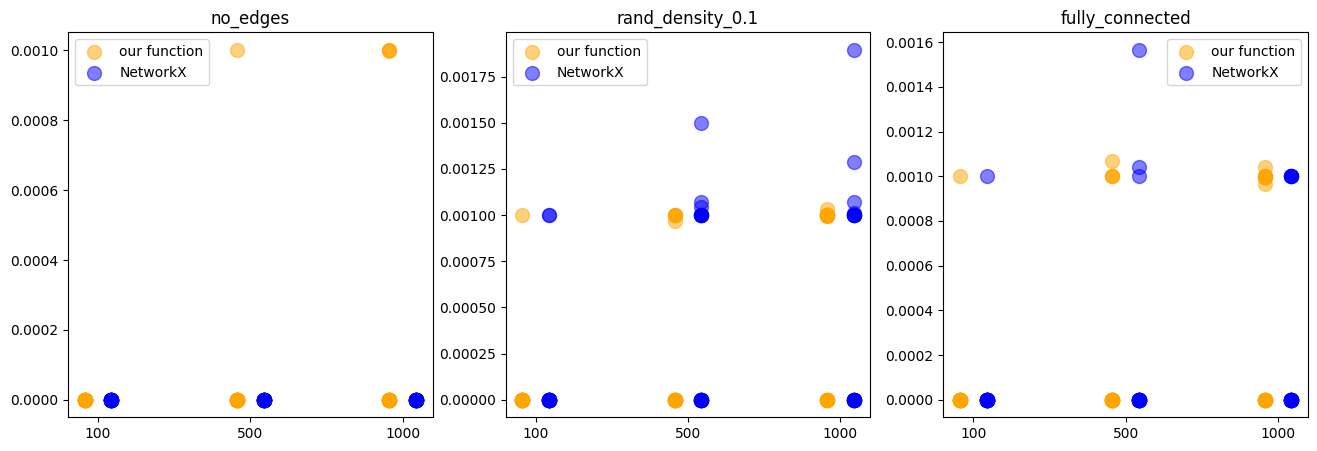

In [16]:
GPT = GraphPerformanceTester(sizes = [100, 500, 1000], iters = 25, graph_density=0.1)
sssp_perf = GPT.run_tests(sp.single_source_shortest_path, nx.single_source_shortest_path_length, ("3",), generators=[False,True], verbose = False)
GPT.plot_results(sssp_perf)

## All pairs shortest path
* Nutzen von single_source_shortest_path für jeden Knoten
* triviales Parallelisieren, da Berechnung für jeden Knoten unabhängig

#### Speichereffizienz O(N²)

In [17]:
GPT = GraphPerformanceTester(sizes = [100, 500, 1000], iters = 25, graph_density=0.1)
apsp_perf = GPT.run_tests(sp.all_pairs_shortest_path, nx.all_pairs_shortest_path_length, (), generators=[False,True], verbose = False)

generating graphs


100%|██████████| 1000/1000 [00:01<00:00, 769.17it/s]


running tests


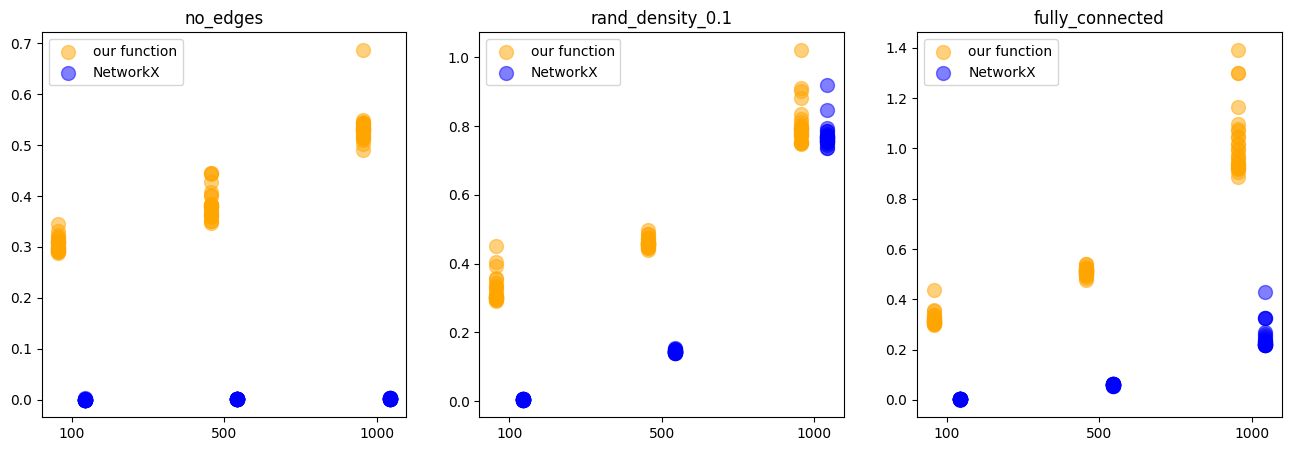

In [18]:
GPT.plot_results(apsp_perf)

#### Warum so langsam für sparse Graphen?
Bsp. Graph ohne Kanten
* Overhead der single_source_shortest_path funktion: für **jeden** Knoten wird gesamtes distanz-dictionary aufgebaut
* NetworkX: nutzt auch single_source_shortest_path, aber Generator funktion: Liefert für jeden Knoten immer nur ersten Wert (Knoten: v, distanz: 0) ohne viel Overhead

## Connected Components
* Aufruf single_source_shortest_path für jeden Knoten, der noch nicht in einer Komponente ist
* Hinzufügen aller Knoten zur Komponente bei denen der Abstand < inf

### Speichereffizienz O(N)

generating graphs


100%|██████████| 1000/1000 [00:01<00:00, 893.24it/s]


running tests


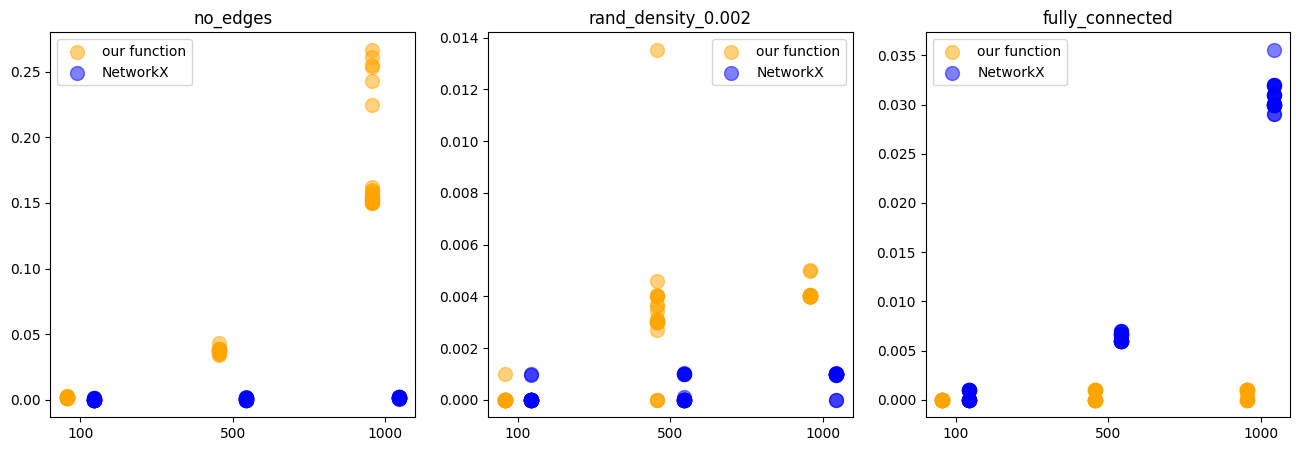

28 13
304 70
872 27


In [19]:
density = 0.002
GPT = GraphPerformanceTester(sizes = [100, 500, 1000], iters = 25, graph_density=density)
cc_perf = GPT.run_tests(sp.connected_components, nx.connected_components, (), generators=[False,True], verbose = False)
GPT.plot_results(cc_perf)

# nochmal Korrektheit testen
for s in GPT.graph_sizes:
    G, nxG = GPT.graphs[s][f"rand_density_{density}"]
    ccsp = len(sp.connected_components(G))
    print(G.n,ccsp)
    assert( ccsp == len([i for i in nx.connected_components(nxG)]))

# Grenzen

#### All pairs shortest path
bio-dmela netzwerk mit ca. 7,500 Knoten und 25,500 Kanten fast 1 Minute (AMD Ryzen 7 3700U, 4 Cores)

In [20]:
network_file ="./networks/bio-dmela.mtx"
G = Graph(network_file, Graph.READ_MOD_EDGE_LIST)
#nxG = nx.read_edgelist(network_file,comments="%")
print(G.n,G.m)
start = time.time()
sp.all_pairs_shortest_path(G)
end = time.time()
print("all_pair_shortest_path: ", end-start)

7393 25569
all_pair_shortest_path:  27.966949701309204


#### Connected Components
Graph mit 20,000 Knoten und ohne Kanten: ca. 1 Min (AMD Ryzen 7 3700U, 4 Cores)

In [21]:
add_N = 20000
G = Graph()
for i in tqdm(range(0,add_N)):
    G.add_node(i)
start = time.time()
sp.connected_components(G)
end = time.time()
print(f"connected components for {G.n}, {G.m}: ", end-start)

100%|██████████| 20000/20000 [00:00<00:00, 562212.76it/s]


connected components for 20000, 0:  65.38485908508301


#### Single Source Shortest Path
* schwierig einen Graphen zu generieren, bei dem SSSP lange braucht. 
* für 200,295 Knoten 59,909,205 Kanten (Kanten alle innerhalb der selben Komponente wie Source): ca. **30s** (AMD Ryzen 7 3700U, 4 Cores)

In [22]:
density = 0.003
add_N = 200000
G = Graph()
source = "3"
connected_nodes = [source]
for i in tqdm(range(0,add_N)):
    G.add_node(i)
max_edges = int((G.n * (G.n-1))/2)
for _ in tqdm(range(int(max_edges*density))):
    a = random.choice(connected_nodes)
    b = str(random.randint(1,G.n))
    while a == b:
        b = str(random.randint(1,G.n))
    G.add_edge(a,b)
    connected_nodes.append(b)
start = time.time()
sp.single_source_shortest_path(G,"3")
end = time.time()
print(f"shortest path for {G.n}, {G.m}: ", end-start)

100%|██████████| 59999700/59999700 [04:49<00:00, 207157.30it/s]


shortest path for 200291, 59908877:  14.704896926879883


# Bidirectional Search

In [23]:
def Average(lst):
    return sum(lst) / len(lst)

## Beispielanwendung
Es wird ein Graph mit 16 Knoten erzeugt. Dabei gibt es verschiedene Kombinationen, welche zum Teil speziele Probleme wie das auftreten einzelner Konten oder besonderer Lable repräsentieren soll.

In [24]:
G = Graph()

G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(4,5)
G.add_edge(5,3)
G.add_edge(6,7)
G.add_edge(7,8)
G.add_edge(8,6)
G.add_edge(0,-1)
G.add_edge(10,11)
G.add_edge(11,12)
G.add_edge(12,13)
G.add_edge(13,10)

G.add_node(9)
G.add_node(15)

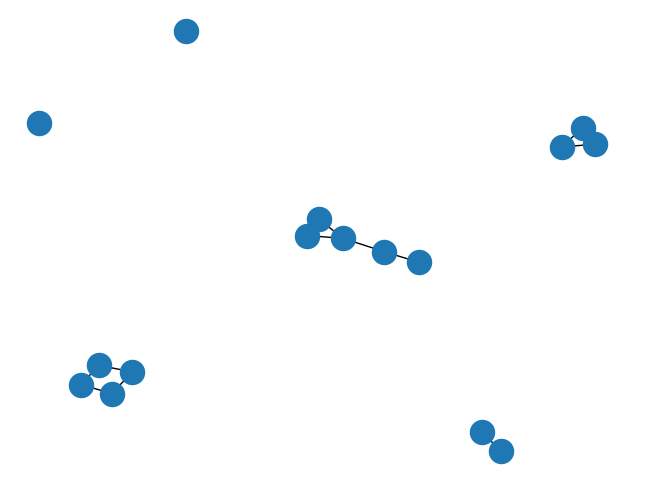

In [25]:
draw_graph(G)

Anwendung der Bidirektionale Suche auf die Nodes s = 1, t = 5

In [26]:
print(sp.shortest_s_t_path(G,1,5))

(['1', '2', '3', '5'], 3)


In [27]:
print(sp.shortest_s_t_path(G,0,-1))

(['0', '-1'], 1)


In [28]:
print(sp.shortest_s_t_path(G,-1,0))

(['-1', '0'], 1)


In [29]:
print(sp.shortest_s_t_path(G,12,10))

(['12', '11', '10'], 2)


In [30]:
print(sp.shortest_s_t_path(G,1,15))

([], inf)


In [31]:
print(sp.shortest_s_t_path(G,15,15))

(['15'], 0)


<img src="presentation/pictures/Netzwerk.png" width="1400">

In [32]:
G = Graph()
G.add_edge(1,2);G.add_edge(1,6);G.add_edge(2,6);G.add_edge(2,3);G.add_edge(6,7);G.add_edge(3,4);G.add_edge(3,7);G.add_edge(7,8);G.add_edge(4,8);G.add_edge(4,5);G.add_edge(8,5);
print(sp.shortest_s_t_path(G,1,5))

(['1', '2', '3', '4', '5'], 4)


## Umsetzung und Laufzeit

### Queue:
Verwendung von len() in O(1) möglich - Im Vergleich zur Liste O(1) <br>
Verwendung von popleft() in O(1) möglich - Im Vergleich zur Liste O(n) <br>
Verwendung von append() in O(1) möglich - Im Vergleich zur Liste O(1) <br>
Verwendung von append() in O(1) möglich - Im Vergleich zur Liste O(1) <br>

-> Wegen popleft wurde sich für eine Queue entschieden

### Dictionary
Verwendung von if Item in Dictionary in O(1) [Average Case] / O(n) [Amortized Worst Case] möglich- Im Vergleich zur Liste O(n) <br>
Verwendung von Dictionary[x] = y in O(1) [Average Case] / O(n) [Amortized Worst Case] möglich- Im Vergleich zur Liste O(1)

-> Wegen dem Key-Value Paaren wurde sich für eine Dictionary entschieden


## Vergleich mit Networkx

In [33]:
network_file ="networks/bio-celegans.mtx"
G = Graph(network_file, Graph.READ_MOD_EDGE_LIST)
nxG = nx.read_edgelist(network_file,comments="%")

In [34]:
num_iterations = 10
num_repeat = 10

s = 1
t = 227

time_shortest_s_t_path_list = timeit.repeat(lambda: sp.shortest_s_t_path(G,s,t),time.process_time, repeat= num_repeat,number=num_iterations)
nx_time_shortest_s_t_path_list = timeit.repeat(lambda: nx.bidirectional_shortest_path(nxG,str(s),str(t)),time.process_time, repeat= num_repeat,number=num_iterations)
SpeedUP = [time_shortest_s_t_path_list[i]/nx_time_shortest_s_t_path_list[i] for i in range(len(time_shortest_s_t_path_list))]

print("time_shortest_s_t_path: ", Average(time_shortest_s_t_path_list))
print("networkx - time_shortest_s_t_path: ", Average(nx_time_shortest_s_t_path_list))
print("networkx - SpeedUp: ", Average(SpeedUP))

time_shortest_s_t_path:  7.894999999962238e-05
networkx - time_shortest_s_t_path:  6.076000000803106e-05
networkx - SpeedUp:  2.9107035626201054


In [35]:
GPT = GraphPerformanceTester(sizes = [100, 500, 1000], iters = 25, graph_density=0.1)
apsp_perf = GPT.run_tests(sp.shortest_s_t_path, nx.bidirectional_shortest_path, (str(1),str(2)), generators=[True,True], verbose = False)

generating graphs


100%|██████████| 1000/1000 [00:01<00:00, 772.05it/s]


running tests


NetworkXNoPath: No path between 1 and 2.

## Sonderfälle

<img src="presentation/pictures/Vergleich.png" width="1400">

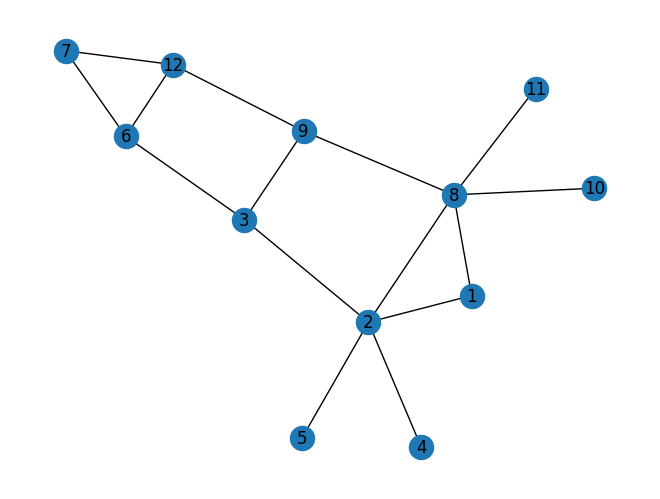

In [36]:
network_file ="networks/special_case_for_networkx.mtx"
G = Graph(network_file, Graph.READ_MOD_EDGE_LIST)
nxG = nx.read_edgelist(network_file,comments="%")
draw_graph(G,label_on = True)

In [37]:
s = 1
t = 7
time_shortest_s_t_path_list = timeit.repeat(lambda: sp.shortest_s_t_path(G,s,t),time.process_time, repeat= num_repeat,number=num_iterations)
nx_time_shortest_s_t_path_list = timeit.repeat(lambda: nx.bidirectional_shortest_path(nxG,str(s),str(t)),time.process_time, repeat= num_repeat,number=num_iterations)
SpeedUP = [time_shortest_s_t_path_list[i]/nx_time_shortest_s_t_path_list[i] for i in range(len(time_shortest_s_t_path_list))]

print("time_shortest_s_t_path: ", Average(time_shortest_s_t_path_list))
print("networkx - time_shortest_s_t_path: ", Average(nx_time_shortest_s_t_path_list))
print("networkx - SpeedUp: ", Average(SpeedUP))

time_shortest_s_t_path:  7.109000000582455e-05
networkx - time_shortest_s_t_path:  6.339000001389649e-05
networkx - SpeedUp:  1.0772010652768875


# Grenzen

In [38]:
network_file ="./networks/bio-dmela.mtx"
G = Graph(network_file, Graph.READ_MOD_EDGE_LIST)
print(G.n,G.m)

s_t = random.sample(G.get_nodes(),2)
start = time.time()
sp.shortest_s_t_path(G,s_t[0],s_t[1])
end = time.time()
print(f"shortest_s_t_path for {G.n}, {G.m}: ", end-start)


7393 25569
shortest_s_t_path for 7393, 25569:  0.0


C:\Users\hanno\AppData\Local\Temp\ipykernel_22824\3464135242.py:5: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  s_t = random.sample(G.get_nodes(),2)


In [39]:
density = 0.0001
add_N = 200000
G = Graph()
source = "3"
connected_nodes = [source]
for i in tqdm(range(0,add_N)):
    G.add_node(i)
max_edges = int((G.n * (G.n-1))/2)
for _ in tqdm(range(int(max_edges*density))):
    a = random.choice(connected_nodes)
    b = str(random.randint(1,G.n))
    while a == b:
        b = str(random.randint(1,G.n))
    G.add_edge(a,b)
    connected_nodes.append(b)

for i in range(100):
    s_t = random.sample(G.get_nodes(),2)
    start = time.time()
    path = sp.shortest_s_t_path(G,s_t[0],s_t[1])
    end = time.time()
    if path[0] != [] and end-start > 0.0:
        print(f"shortest path for {G.n}, {G.m} from {s_t[0]} to {s_t[1]}: ", end-start)

100%|██████████| 1999990/1999990 [00:08<00:00, 226332.56it/s]
C:\Users\hanno\AppData\Local\Temp\ipykernel_22824\4129219884.py:18: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  s_t = random.sample(G.get_nodes(),2)


shortest path for 200010, 1999863 from 168620 to 173748:  0.008999824523925781
shortest path for 200010, 1999863 from 167966 to 114780:  0.00799870491027832
shortest path for 200010, 1999863 from 172346 to 60701:  0.00699925422668457
shortest path for 200010, 1999863 from 54554 to 185298:  0.00796818733215332
shortest path for 200010, 1999863 from 120540 to 2010:  0.008003950119018555
shortest path for 200010, 1999863 from 97993 to 141970:  0.009001493453979492
shortest path for 200010, 1999863 from 29207 to 45799:  0.006005287170410156
shortest path for 200010, 1999863 from 191986 to 95669:  0.009001493453979492
shortest path for 200010, 1999863 from 93968 to 113365:  0.007030963897705078
shortest path for 200010, 1999863 from 69523 to 65449:  0.006042003631591797
shortest path for 200010, 1999863 from 101108 to 49699:  0.008917570114135742
shortest path for 200010, 1999863 from 133244 to 35667:  0.008011579513549805
shortest path for 200010, 1999863 from 190503 to 184320:  0.01502895